<h1> Herrera, Oliver O.

<h2> ELEC303 MIDTERMS EXAM

In [15]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [16]:
Crimes = pd.read_csv('Chicago_Crimes - Chicago_Crimes.csv')

In [17]:
Crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,6,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,7,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,6,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 00:00:00,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 00:00:00,094XX S HARVARD AVE,430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 00:00:00,084XX S VINCENNES AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 00:00:00,050XX S ABERDEEN ST,530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [18]:
Crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [19]:
Crimes['Date'] = Crimes['Date'].astype(str).str.replace('/', '-').str.strip()
Crimes['Date_parsed'] = pd.to_datetime(Crimes['Date'], dayfirst=False, errors='coerce')

Crimes['Year'] = Crimes['Date_parsed'].dt.year
Crimes['Month'] = Crimes['Date_parsed'].dt.month
Crimes['DayOfWeek'] = Crimes['Date_parsed'].dt.day_name()
Crimes['Hour'] = Crimes['Date_parsed'].dt.hour
Crimes['DayType'] = 'Weekday'
Crimes.loc[Crimes['DayOfWeek'].isin(['Saturday','Sunday']), 'DayType'] = 'Weekend'

In [20]:
Crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Date_parsed,Month,Hour
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000,249123,249123.000000,249123.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845,2024-10-03 08:31:57.251478528,6.680058,12.521084
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567,2024-04-14 00:00:00,1.000000,0.000000
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071,2024-07-06 13:45:30,4.000000,8.000000
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690,2024-09-27 03:00:00,7.000000,13.000000
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233,2024-12-28 18:20:00,9.000000,18.000000
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531,2025-04-12 00:00:00,12.000000,23.000000
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875,NaN,3.314884,6.843107


<H1> 1. Total Crimes per Year.

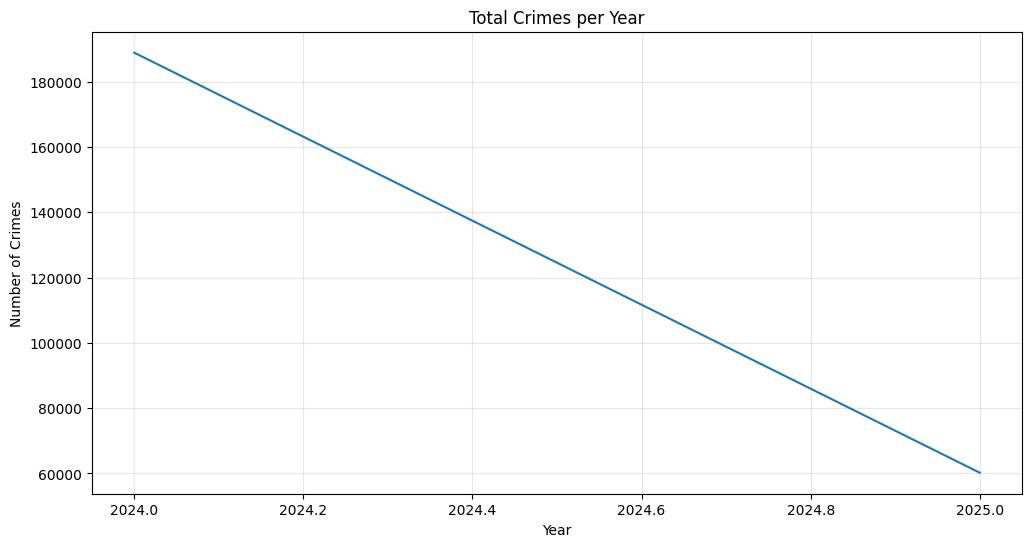

In [21]:
Crimes.groupby('Year').size().plot(kind='line', figsize=(12,6))
plt.title("Total Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2> Insight 1: The graph indicates that, in comparison to 2025, 2024 had the most incidences.  The number of occurrences decreased from 180k to 60k in 2025.

<h2> Insight 2: Unexpected fluctuations in the crime rate during the year might be caused by modifications to policies, the state of the economy, or other outside variables.

<h1> 2. Which type of crime is the most common?

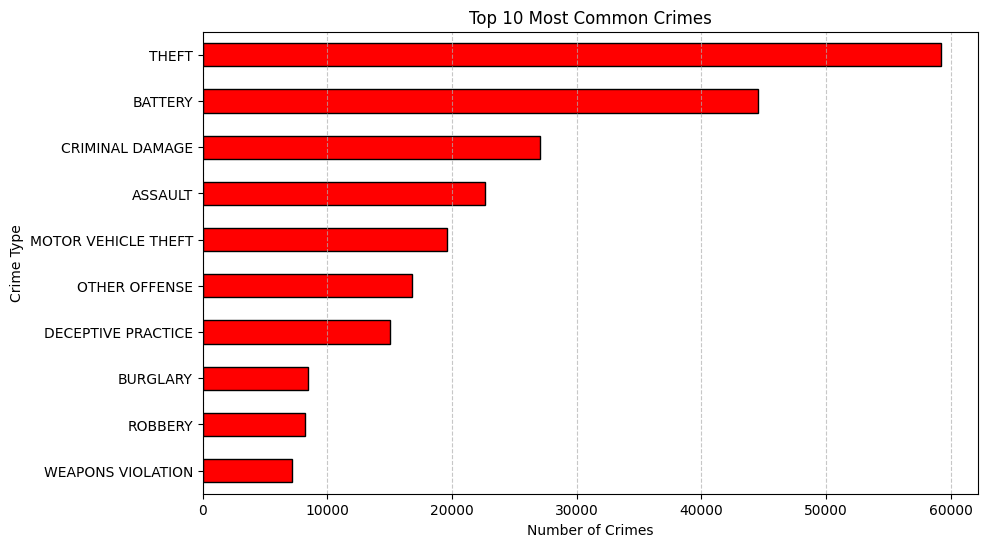

In [22]:
primary_counts = Crimes.groupby('Primary Type')['ID'].count()
top10_primary = primary_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top10_primary.plot(kind='barh', color='red', edgecolor='black')

plt.title('Top 10 Most Common Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<H2> Insight 1: With over 70,000 occurrences, theft is the most prevalent crime, according to the graph.

<h2> Insight 2: With nearly 40,000 instances each, battery and criminal damage come next.

<h2> Insight 3: With less than 25,000 cases, deceptive practice and burglary are among the lowest in the top 10.

<h1> 3. What percentage of crimes happen in the top 5 locations?

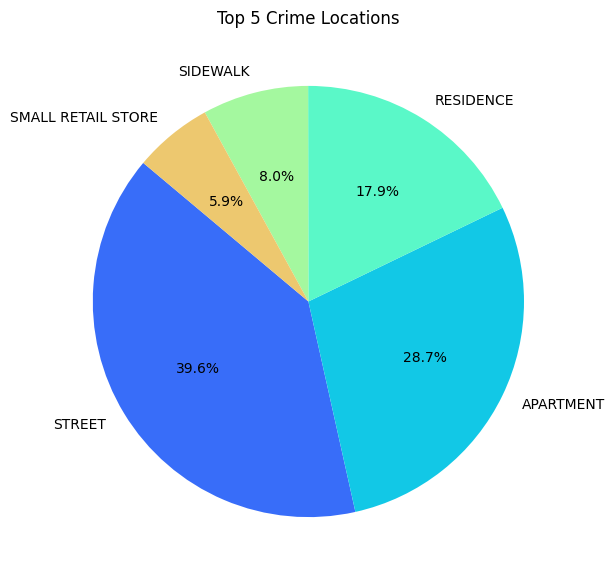

In [23]:
top5_locations = Crimes['Location Description'].value_counts().head(5)
top5_locations

plt.figure(figsize=(7,7))
plt.pie(top5_locations.values, labels=top5_locations.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("rainbow"))
plt.title('Top 5 Crime Locations')
plt.show()

<h2> Insight 1: We can observe that several crimes have already occurred in the streets, homes, and apartments in this particular area.  More crime prevention measures in certain locations would be preferable.

<h2> Insight 2: The most hazardous places are streets (39.6%), followed by small retail establishments (5.9%).  The significant contrast makes it obvious where initiatives aimed at preventing crime should concentrate.

<h1> 4. What are the top 5 locations where crimes occurred?

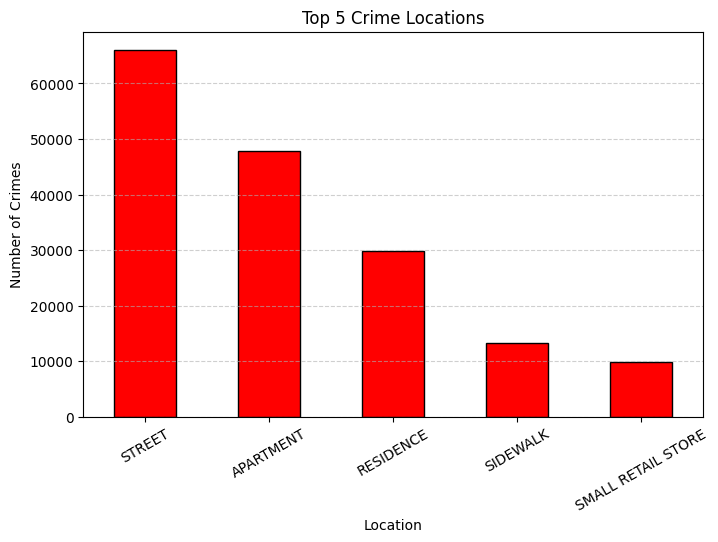

In [24]:
location_counts = Crimes.groupby('Location Description')['ID'].count()
top5_locations = location_counts.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
top5_locations.plot(kind='bar', color='red', edgecolor='black')

plt.title('Top 5 Crime Locations')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h2> Insight 1: With more than 60,000 incidents, it is evident that most crimes take place on the street.

<h2> Insight 2: With over 40,000 offenses reported in each, residences and apartments are particularly prevalent.

<h2> Insight 3: The following public areas have lower but nonetheless noticeable crime rates: sidewalks and alleys.</h2>

<h1> 5. Arrests vs Non-Arrests.

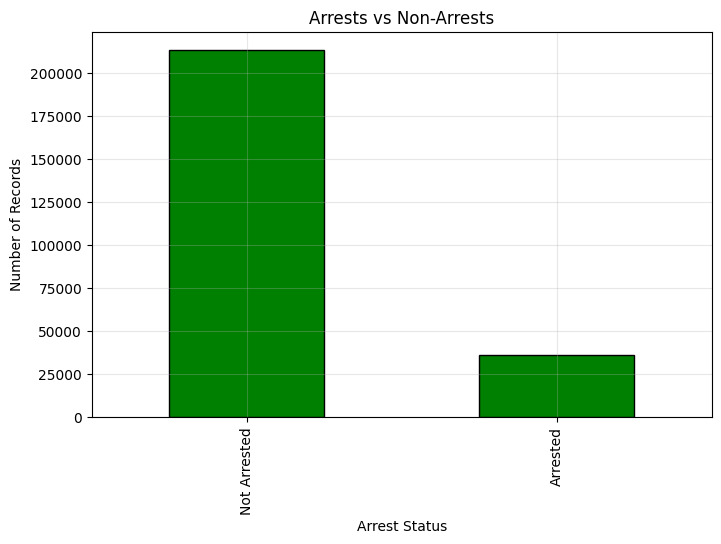

In [25]:
arrest_counts = Crimes['Arrest'].value_counts()
arrest_counts.index = arrest_counts.index.map({True: "Arrested", False: "Not Arrested"})
arrest_counts.plot(kind='bar',color='green', edgecolor='black', figsize=(8,5))
plt.title("Arrests vs Non-Arrests")
plt.ylabel("Number of Records")
plt.xlabel("Arrest Status")
plt.grid(alpha=0.3)
plt.show()

<h2> Insight 1: The fact that most reported crimes result in no arrests suggests that there may be gaps in the resources available to law enforcement or in the collecting of evidence.

<H2> Insight 2: Since many criminals were not apprehended, this disparity highlights the difficulty in converting reported crimes into effective arrests and prosecutions.

<h1> 6. Do crimes happen more often on the weekends or during the weekdays?

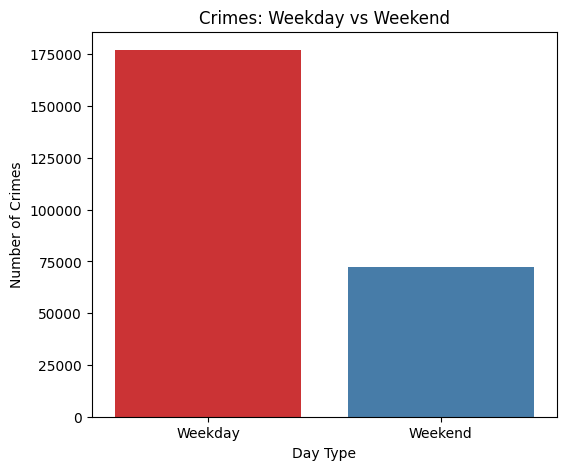

In [29]:
daytype_counts = Crimes['DayType'].value_counts()
daytype_counts
plt.figure(figsize=(6,5))
sns.barplot(x=daytype_counts.index, y=daytype_counts.values, palette="Set1")
plt.title('Crimes: Weekday vs Weekend')
plt.xlabel('Day Type')
plt.ylabel('Number of Crimes')
plt.show()

<h2> Insight 1: A significant difference in crimes that occurred on weekends and weekdays is seen from the graph.  Weekday crimes are particularly high, with up to 175k instances reported.

<h2> Insight 2: On weekdays, people are more likely to be busy and be outside, which increases the likelihood of unforeseen crimes.  The higher number of events is not surprising because weekdays have more days.

<h1> 7. Which month has the most crimes?

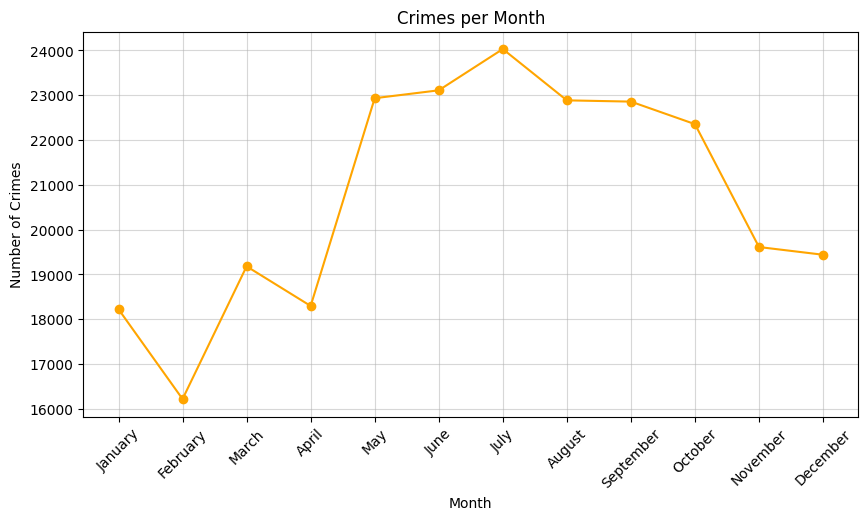

In [41]:
import calendar

Crimes['Date'] = pd.to_datetime(Crimes['Date'], errors='coerce')
Crimes['Month_num'] = Crimes['Date'].dt.month

monthly_crimes = Crimes.groupby('Month_num')['ID'].count()

monthly_crimes = monthly_crimes.reindex(range(1, 13), fill_value=0)
month_labels = [calendar.month_name[i] for i in range(1, 13)]

plt.figure(figsize=(10,5))
plt.plot(month_labels, monthly_crimes, marker='o', color='Orange')
plt.title('Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()

<h2> Insight 1: July is clearly the month with the most criminal activity, according to the graph.

<h2> Insight 2: February has the lowest rates of crime.

<h2> Insight 3: In general, there is a seasonal trend to crime, with summertime seeing the highest level of activity.

<h1> 8. Which day of the week records the most crimes?

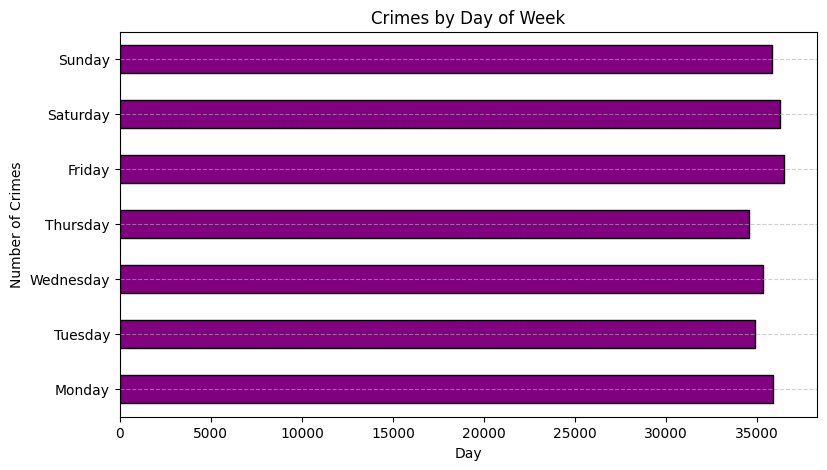

In [46]:
Crimes['DayOfWeek'] = Crimes['Date'].dt.day_name()
day_counts = Crimes.groupby('DayOfWeek')['ID'].count()

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counts = day_counts.reindex(days_order)

plt.figure(figsize=(9,5))
day_counts.plot(kind='barh', color='purple', edgecolor='black')

plt.title('Crimes by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h2> Insight 1: According to the graph, Friday and Monday had the greatest crime rates, with over 35,000 instances each.

<h2> Insight 2: The least amount of crime occurs on Thursdays.

<h2> Insight 3: There are more than 30,000 cases of all offenses.

<h1> 9. What are the differences between domestic and non-domestic crimes?

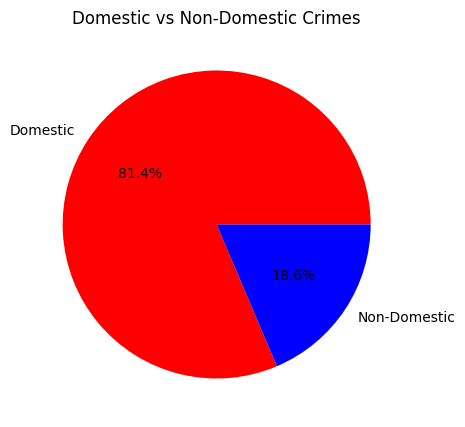

In [50]:
domestic_counts = Crimes.groupby('Domestic')['ID'].count()

plt.figure(figsize=(6,5))
domestic_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red','blue'], labels=['Domestic','Non-Domestic'])

plt.title('Domestic vs Non-Domestic Crimes')
plt.ylabel('')
plt.show()

<h2> Insight 1: According to the pie graph, domestic offenses account for 81.4% of all recorded instances.

<h2> Insight 2: Approximately 19% of incidents are non-domestic, which is still quite a bit considering the size of the dataset.

<h2> Insight 3: The graph demonstrates the significant disparity between reported domestic and non-domestic crime causes.

<h1> 10. Which months see the most arrests?

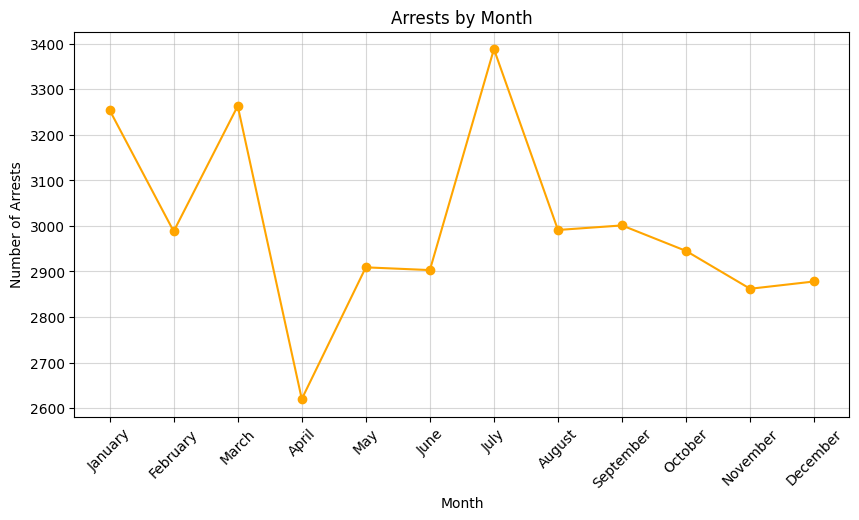

In [54]:
Crimes['Date'] = pd.to_datetime(Crimes['Date'], errors='coerce')
Crimes['Month'] = Crimes['Date'].dt.month

arrests_by_month = Crimes[Crimes['Arrest'] == True].groupby('Month')['ID'].count()

plt.figure(figsize=(10,5))
arrests_by_month.plot(kind='line', marker='o', color='Orange')

month_names = [calendar.month_name[i] for i in arrests_by_month.index]
plt.xticks(arrests_by_month.index, month_names, rotation=45)

plt.title('Arrests by Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.grid(alpha=0.5)
plt.show()

<h2> Insight 1: July has the highest number of arrests, with over 3400 made.

<h2> Insight 2: Less than 2700 arrests are made in April, which is generally the lowest month.

<h2> Insight 3: There is a summer rise in arrests, which is consistent with the seasonality of general crime.

<h1> 11. Which wards in Chicago report the most crimes?

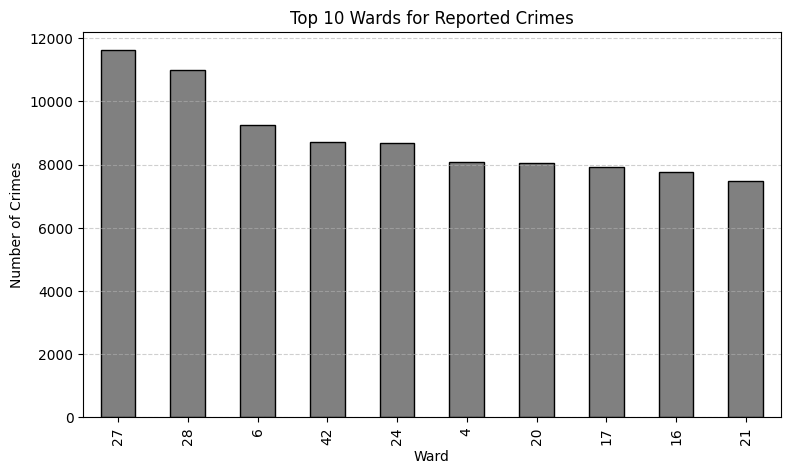

In [57]:
# Group by Ward
ward_counts = Crimes.groupby('Ward')['ID'].count().sort_values(ascending=False).head(10)

# Plot Top 10 Wards
plt.figure(figsize=(9,5))
ward_counts.plot(kind='bar', color='gray', edgecolor='black')

plt.title('Top 10 Wards for Reported Crimes')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<h2> Insight 1: With almost 10,000 complaints apiece, the 27th and 28th Wards have the highest crime rates.

<h2> Insight 2: With more than 8000 recorded offenses, the 6th ward is in third place for the highest crime rates.

<h2> Insight 3: At least 7000 offenses have been reported in ward 21st, which is the ward with the fewest reported crimes.

<h1> 12.  Which location most likely for Theft to happen?

<Axes: ylabel='Location Description'>

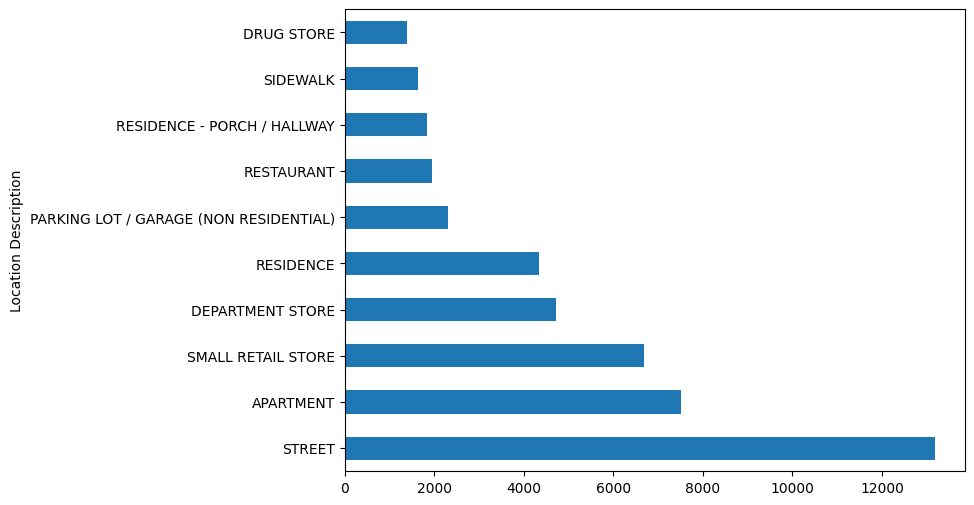

In [69]:
Crimes[Crimes['Primary Type'] == 'THEFT']['Location Description'].value_counts().head(10).plot(kind='barh', figsize=(8,6))

<h2> Insight 1: The street and the apartment are separated by a large distance.  The streets are the most probable places for theft to occur, which makes sense given that they are frequently crowded and allow thieves to more easily steal from people without their knowledge.

<h2> Insight 2: In order to prevent thieves from stealing other people's property, we need nevertheless exercise additional caution everywhere, even if there are fewer occurrences in the other categories.

<h2> Insight 3: Chicago should implement a more effective crime prevention strategy to deter thieves.  Given the over 12,000 thefts that occur on the streets, it would be preferable to have additional police officers on patrol in this region.

<h1> 13. Which crime types are most often linked to domestic incidents?

<Axes: ylabel='Primary Type'>

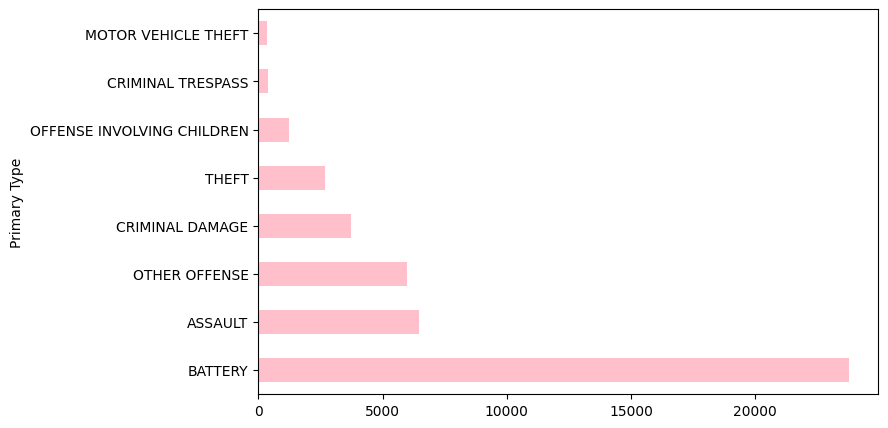

In [72]:
Crimes[Crimes['Domestic'] == True]['Primary Type'].value_counts().head(8).plot(kind='barh', figsize=(8,5), color='Pink')

<h2> Insight 1: The majority of domestic situations manifest as criminal damage, assaults, and battery. The majority of these occurrences take place in private residences rather than public areas. This demonstrates just how violent Chicago is.

<h2> Insight 2: In addition to disagreements and threats, domestic violence is a prominent factor in domestic events, as seen by the prevalence of attacks and battery.

<h1> 14. What are the most common drug-related crimes?

<Axes: xlabel='Description'>

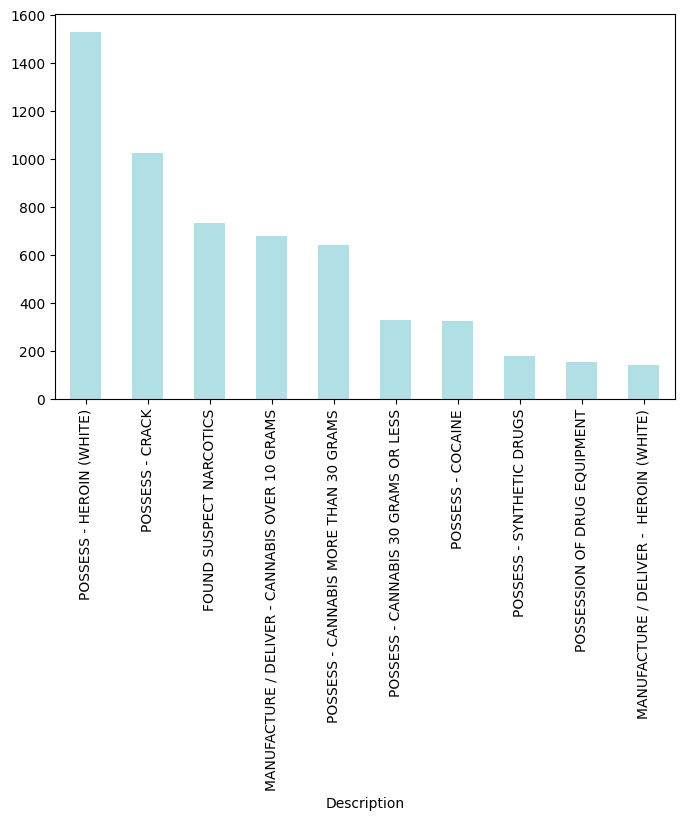

In [75]:
Crimes[Crimes['Primary Type'] == 'NARCOTICS']['Description'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='powderblue')

<h2> Insight 1:  The fact that possession accounts for the bulk of drug arrests indicates that law enforcement is apprehending more users than top-level sellers.  To apprehend such high-level dealers, law enforcement should put forth more effort.

<h2> Insight 2: Distribution is still present, although in very lesser quantities.  This might indicate that resources are primarily directed on street-level policing or that trafficking is more difficult to identify.

<h1> 36 INSIGHTS ALL